<a href="https://colab.research.google.com/github/parkjh21c/ML-DL/blob/main/LSTM%2CRANDOMFOREST(%EB%AF%B8%EC%99%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/smarthon/data.xlsx')

df['일자'] = pd.to_datetime(df['일자'])

# 데이터 순서 뒤집고 인덱스 다시 정의
df = df.sort_index(ascending=False)
df = df.reset_index(drop=True)
df = df.set_index('일자')

df

,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수,...,배당수익률,외국인 보유수량,외국인 지분율,외국인 한도수량,외국인 한도소진율,공매도 수량_거래량_전체,공매도 수량_순보유잔고수량,공매도 금액_거래대금_전체,공매도 금액_순보유잔고금액,등락
일자,,,,,,,,,,,,,,,,,,,,,
2023-01-02,76138,0,0.00,76552,78621,75000,691041,51302865100,3726370000000,50630000,...,0.95,12069472,23.84,50630000,23.84,63513,171768,4688569400,12642124800,0
2023-01-03,73862,-2276,-2.99,76138,76966,72414,851220,60766095500,3614980000000,50630000,...,0.98,11960663,23.62,50630000,23.62,71153,188146,5085308900,13433624400,1
2023-01-04,74276,414,0.56,74069,74586,71586,555372,39384977200,3635230000000,50630000,...,0.97,11991757,23.69,50630000,23.69,52306,203048,3699538300,14578846400,0
2023-01-05,69103,-5173,-6.96,74379,74897,67862,1516452,103072000000,3382080000000,50630000,...,1.05,12008255,23.72,50630000,23.72,170021,318005,11533673100,21242734000,1
2023-01-06,69310,207,0.30,68276,70552,68069,528494,35514686400,3392210000000,50630000,...,1.04,11674802,23.06,50630000,23.06,24007,270666,1606169300,18134622000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,326000,21000,6.89,306500,328500,306500,336668,107690000000,14859500000000,45581161,...,0.55,19749349,43.33,45581161,43.33,473,13701,153055500,4466526000,0
2024-12-24,324000,-2000,-0.61,329000,330000,320500,179574,58184245500,14768300000000,45581161,...,0.56,19822787,43.49,45581161,43.49,195,13701,62993500,4439124000,0
2024-12-26,323500,-500,-0.15,324000,327000,316500,186277,60108541000,14745500000000,45581161,...,0.56,19778192,43.39,45581161,43.39,837,11551,270263000,3736748500,0


필요하면 추가로 넣어도 될듯? (ex. kospi, 방위 종목)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 489 entries, 2023-01-02 to 2024-12-30
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   종가              489 non-null    int64  
 1   대비              489 non-null    int64  
 2   등락률             489 non-null    float64
 3   시가              489 non-null    int64  
 4   고가              489 non-null    int64  
 5   저가              489 non-null    int64  
 6   거래량             489 non-null    int64  
 7   거래대금            489 non-null    int64  
 8   시가총액            489 non-null    int64  
 9   상장주식수           489 non-null    int64  
 10  EPS             489 non-null    int64  
 11  PER             489 non-null    float64
 12  선행 EPS          489 non-null    int64  
 13  선행 PER          489 non-null    float64
 14  BPS             489 non-null    int64  
 15  PBR             489 non-null    float64
 16  주당배당금           489 non-null    int64  
 17  배당수익률           

주가 그래프(2023/01/01 - 2024/12/31)   
index - 일자, 종가 column 필요

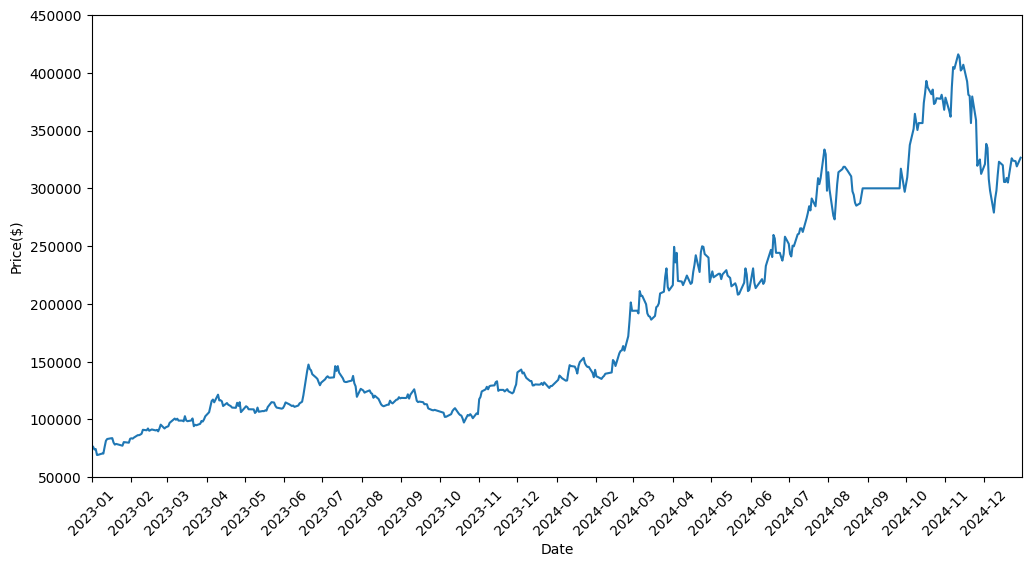

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


plt.figure(figsize=(12,6))
plt.plot(df.index, df['종가'])

plt.xlabel('Date')
plt.ylabel('Price($)')

# x축 범위 설정
plt.xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2024-12-31'))

# x축 눈금 설정
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# x축 레이블 회전
plt.xticks(rotation=45)

plt.yticks([50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000])

plt.show()

LSTM + 랜덤포레스트

1. 데이터 분리(섞기 X)   


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


target_column = df.columns[-1]

X = df.drop(target_column, axis=1)
y = df[target_column]

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:] # random forest 때문
y_train, y_test = y[:train_size], y[train_size:]


랜덤 포레스트를 통해 중요한 특징 찾기   
( feature_importances_ : 해당 피처가 클래스를 나누는데 얼마나 영향을 미쳤는지를 0 ~ 1로 표기하는 척도)    


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# 랜덤 포레스트
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 중요한 특징 선택
important_features = rf.feature_importances_

important_features를 그래프로 나타내어 중요도 비교

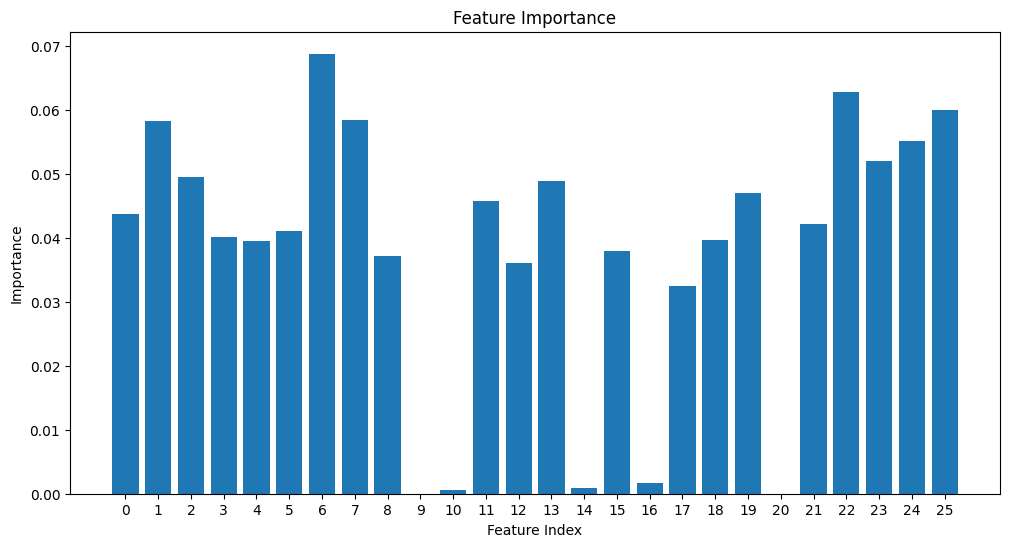

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(important_features.argsort(), important_features[important_features.argsort()])
plt.xticks(np.arange(len(important_features)))
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

대비 등락률 => 추세 때문에 높은 연관성(예상)


위 Features들을 높은 순서대로 정렬한 뒤, 20위 까지 선택

In [ ]:
top_features_indices = important_features.argsort()[-20:][::-1] # Feature 선택 수를 변경하고 싶을 시 변경 필요
X_selected = X_train.iloc[:,top_features_indices]
X_selected_last_test = X_test.iloc[:,top_features_indices]
X_selected.columns

Index(['거래량', '공매도 수량_거래량_전체', '공매도 금액_순보유잔고금액', '거래대금', '대비',
       '공매도 금액_거래대금_전체', '공매도 수량_순보유잔고수량', '등락률', '선행 PER', '외국인 지분율', 'PER',
       '종가', '외국인 한도소진율', '저가', '시가', '외국인 보유수량', '고가', 'PBR', '시가총액',
       '선행 EPS'],
      dtype='object')

시가 총액, 상장 주식수, BPS(주당순자산가치), 주당배당금, 외국인 한도수량 은 거의 상관 없거나 아예 상관 없는걸로 보임

주식마다 sequence_length를 다르게 학습하여 가장 예측 결과 값이 좋은 걸로 선택하는 방법도 고려해볼 필요가 있음

In [ ]:
X_test = X[train_size - 20:]
y_test = y[train_size - 20:]
X_selected_test = X_test.iloc[:,top_features_indices]
X_selected_test


,거래량,공매도 수량_거래량_전체,공매도 금액_순보유잔고금액,거래대금,대비,공매도 금액_거래대금_전체,공매도 수량_순보유잔고수량,등락률,선행 PER,외국인 지분율,PER,종가,외국인 한도소진율,저가,시가,외국인 보유수량,고가,PBR,시가총액,선행 EPS
일자,,,,,,,,,,,,,,,,,,,,
2024-07-08,545599,840,2606797500,136460000000,10344,209470500,10365,4.14,19.49,36.42,15.62,260172,36.42,249310,249828,18438501,261724,3.60,12733400000000,12904
2024-07-09,381822,777,2611980000,95455454000,518,195222000,10365,0.20,19.53,36.64,15.65,260690,36.64,253966,260172,18551440,263276,3.61,12758800000000,12904
2024-07-10,1228430,3127,2658622500,323934000000,4655,833134000,10365,1.79,19.94,36.53,15.93,265345,36.53,264310,266379,18494773,282931,3.68,12986600000000,12866
2024-07-11,471648,95,2658366000,121836000000,0,24499000,10364,0.00,19.94,36.74,15.93,265345,36.74,263793,267414,18601425,273103,3.68,12986600000000,12866
2024-07-12,341135,1182,2627020500,86880646000,-3104,300772000,10363,-1.17,19.75,36.76,15.74,262241,36.76,259655,268966,18609401,270000,3.63,12834700000000,12837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,336668,473,4466526000,107690000000,21000,153055500,13701,6.89,15.65,43.33,20.24,326000,43.33,306500,306500,19749349,328500,4.67,14859500000000,20825
2024-12-24,179574,195,4439124000,58184245500,-2000,62993500,13701,-0.61,15.56,43.49,20.12,324000,43.49,320500,329000,19822787,330000,4.64,14768300000000,20825
2024-12-26,186277,837,3736748500,60108541000,-500,270263000,11551,-0.15,15.53,43.39,20.09,323500,43.39,316500,324000,19778192,327000,4.64,14745500000000,20825


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 스케일링
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X_selected)

# 시퀀스 생성 함수
def create_sequences(data, label, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length):
        seq = data[i:(i+seq_length)]
        X.append(seq)
        y.append(label[i+seq_length])
    return np.array(X), np.array(y)

# 시퀀스 생성
X_s, y_s = create_sequences(scaled_data, y_train, seq_length=20)

X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.2, shuffle=False)

<ipython-input-9-72b3631d943d>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(label[i+seq_length])


In [ ]:
print(X_s.shape)

(371, 20, 20)


scaled_data_test

In [ ]:
scaled_data_test = scaler.fit_transform(X_selected_test)
X_lstm_test, _ = create_sequences(scaled_data_test, y_test, seq_length=20)

<ipython-input-9-72b3631d943d>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(label[i+seq_length])


In [ ]:
scaled_data_test.shape

(118, 20)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_s_train.shape[1], X_s_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))  # 이진 분류 문제의 경우 sigmoid 활성화 함수 사용

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
print(len(X_s_train))
print(len(y_s_train))

296
296


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_s_train, y_s_train, epochs=10, batch_size=32, validation_data=(X_s_test, y_s_test))

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.4746 - loss: 0.7005 - val_accuracy: 0.5467 - val_loss: 0.6893
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5610 - loss: 0.6903 - val_accuracy: 0.5467 - val_loss: 0.6890
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5449 - loss: 0.6882 - val_accuracy: 0.5467 - val_loss: 0.6899
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5398 - loss: 0.6935 - val_accuracy: 0.5467 - val_loss: 0.6890
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5765 - loss: 0.6902 - val_accuracy: 0.5467 - val_loss: 0.6891
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5121 - loss: 0.6924 - val_accuracy: 0.5467 - val_loss: 0.6893
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5470 - loss: 0.6915 - val_accuracy: 0.5467 - val_loss: 0.6887
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5322 - loss: 0.6909 - val_accuracy: 0.5467 - 

In [ ]:
lstm_feature = model.predict(X_lstm_test)
lstm_feature
# 0.5 기준으로 0 과 1 예측

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step


array([[0.5649021 ],
       [0.55845374],
       [0.552795  ],
       [0.5519315 ],
       [0.55344754],
       [0.5574511 ],
       [0.5625799 ],
       [0.5675018 ],
       [0.57305646],
       [0.57881045],
       [0.5827008 ],
       [0.58353424],
       [0.58374614],
       [0.58500725],
       [0.587597  ],
       [0.5902945 ],
       [0.59197474],
       [0.5913711 ],
       [0.5975384 ],
       [0.60425174],
       [0.6133684 ],
       [0.6228175 ],
       [0.6308118 ],
       [0.6370036 ],
       [0.6422814 ],
       [0.6467116 ],
       [0.6505728 ],
       [0.65371966],
       [0.6562513 ],
       [0.6583616 ],
       [0.66010547],
       [0.661769  ],
       [0.6627244 ],
       [0.66351724],
       [0.66397345],
       [0.6640815 ],
       [0.6510172 ],
       [0.63726383],
       [0.62582695],
       [0.61292386],
       [0.59921396],
       [0.5872082 ],
       [0.5750634 ],
       [0.56711334],
       [0.56089145],
       [0.5554349 ],
       [0.54934347],
       [0.543

In [ ]:
X_lstm_test.shape

(98, 20, 20)

In [ ]:
lstm_feature.shape

(98, 1)

해결 방안   
1. 결측치로 놔주고 그 뒤의 값만 처리   
2. 어쩌지   


In [ ]:
X_selected_last_test['lstm_feature'] = lstm_feature
X_selected_last_test

,거래량,공매도 수량_거래량_전체,공매도 금액_순보유잔고금액,거래대금,대비,공매도 금액_거래대금_전체,공매도 수량_순보유잔고수량,등락률,선행 PER,외국인 지분율,...,종가,외국인 한도소진율,저가,시가,외국인 보유수량,고가,PBR,시가총액,선행 EPS,lstm_feature
일자,,,,,,,,,,,,,,,,,,,,,
2024-08-05,1287553,1576,3890190000,352630000000,-22759,428449500,14570,-7.61,17.79,37.07,...,276207,37.07,255517,294828,18766782,303103,3.83,13518200000000,15013,0.564902
2024-08-06,1341907,390,4387680000,361531000000,-3104,104407000,16620,-1.12,17.59,36.92,...,273103,36.92,271034,281897,18692498,288621,3.78,13366300000000,15007,0.558454
2024-08-07,931915,196,4636422000,256862000000,15518,54947500,16618,5.68,18.59,36.52,...,288621,36.52,272069,274138,18488435,294310,4.00,14125800000000,15007,0.552795
2024-08-08,880321,227,3073532000,251473000000,15000,65639000,10472,5.20,19.47,36.55,...,303621,36.55,280345,289138,18506153,305172,4.21,14859900000000,15072,0.551932
2024-08-09,585906,780,5700640500,178105000000,10345,236643000,18783,3.41,19.96,36.71,...,313966,36.71,309310,310862,18586565,319138,4.35,15366200000000,15203,0.553448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,336668,473,4466526000,107690000000,21000,153055500,13701,6.89,15.65,43.33,...,326000,43.33,306500,306500,19749349,328500,4.67,14859500000000,20825,0.501839
2024-12-24,179574,195,4439124000,58184245500,-2000,62993500,13701,-0.61,15.56,43.49,...,324000,43.49,320500,329000,19822787,330000,4.64,14768300000000,20825,0.505828
2024-12-26,186277,837,3736748500,60108541000,-500,270263000,11551,-0.15,15.53,43.39,...,323500,43.39,316500,324000,19778192,327000,4.64,14745500000000,20825,0.510053


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_selected, y_train)

random forest를 어떻게 학습할 것인가?

In [ ]:
from sklearn.metrics import accuracy_score

# 정확도 계산
accuracy = accuracy_score(y_test[sequence_length:], y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


NameError: name 'sequence_length' is not defined